# 1 Import libraries

In [1]:
!pip install nxviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 5.8 MB/s eta 0:00:00


In [2]:
import networkx as nx
import nxviz as nv
from nxviz import annotate, highlights
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import seaborn as sns
import pandas as pd

/usr/local/lib/python3.10/dist-packages/nxviz/__init__.py:18: UserWarning: 
nxviz has a new API! Version 0.7.4 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.4, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  warnings.warn(


# 2 Baseline graph

In [3]:
g = nx.Graph()
g.add_edges_from([('a','d'),
                  ('b','e'),
                  ('c','e'),
                  ('d','i'),
                  ('e','i'),
                  ('f','h'),
                  ('g','h'),
                  ('h','i'),('h','j'),
                  ('i','l'),
                  ('j','n'),
                  ('l','m'),('l','n'),('l','k'),('l','o'),
                  ('m','u'),
                  ('n','k'),('n','o'),('n','s'),
                  ('o','k'),('o','p'),('o','s'),
                  ('p','k'),('p','s'),
                  ('k','s'),('k','u'),
                  ('q','s'),
                  ('r','s'),
                  ('s','u')])

for n, d in g.nodes(data=True):
    g.nodes[n]["class"] = g.degree(n)

In [4]:
g.nodes(data=True)

NodeDataView({'a': {'class': 1}, 'd': {'class': 2}, 'b': {'class': 1}, 'e': {'class': 3}, 'c': {'class': 1}, 'i': {'class': 4}, 'f': {'class': 1}, 'h': {'class': 4}, 'g': {'class': 1}, 'j': {'class': 2}, 'l': {'class': 5}, 'n': {'class': 5}, 'm': {'class': 2}, 'k': {'class': 6}, 'o': {'class': 5}, 'u': {'class': 3}, 's': {'class': 7}, 'p': {'class': 3}, 'q': {'class': 1}, 'r': {'class': 1}})

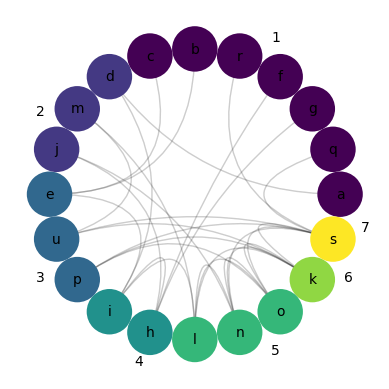

In [5]:
ax = nv.circos(g,node_color_by="class",group_by="class")
nv.annotate.circos_group(g, group_by="class")
annotate.circos_labels(g, group_by="class")

# 3 Basic definitions

Exccentriciy, Periphery, Radius, Center

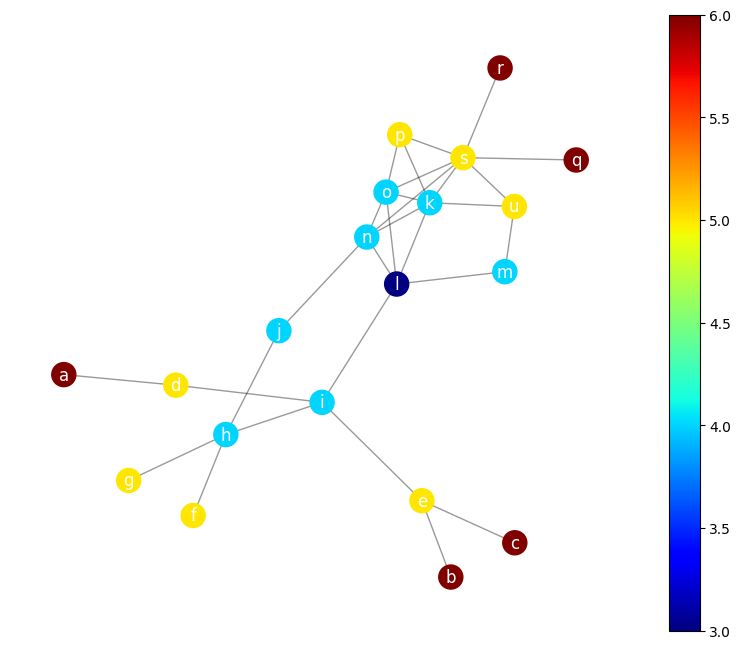

In [6]:
fig, ax = plt.subplots(1,1,figsize=(10,8))

# layout position
pos = nx.spring_layout(g,seed=123456789,k=0.3)
# color of nodes based on eccentricity
color = list(dict(nx.eccentricity(g)).values())

# draw edges
nx.draw_networkx_edges(g,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(g,
                 pos=pos,
                 node_color=color,
                 cmap=plt.cm.jet,ax=ax)

# draw labels
nx.draw_networkx_labels(g, pos=pos,
                        font_color='white', ax=ax)


plt.axis("off")
plt.colorbar(nodes)
plt.savefig('eccentricity.png', transparent=True,dpi=300)
plt.show()

In [7]:
# the diameter of networks is the maximum eccentricy
print("Diameter of network (g): {}".format(nx.diameter(g)))

# whom are in the diamter
print([k for k,v in nx.eccentricity(g).items() if v == nx.diameter(g)])

Diameter of network (g): 6
['a', 'b', 'c', 'q', 'r']


In [8]:
# the periphery of a network is a set of all nodes whose eccentriciy is equals the diameter
nx.periphery(g)

['a', 'b', 'c', 'q', 'r']

In [9]:
# the radius of a network is the minimum eccentricity
print("Radius of network(g): {}".format(nx.radius(g)))
print([k for k,v in nx.eccentricity(g).items() if v == nx.radius(g)])

Radius of network(g): 3
['l']


In [10]:
# the center of a network is a set all nodes whose eccentricity equal the radius
nx.center(g)

['l']

# 4 Node ranking

## 4.1 Degree Centrality

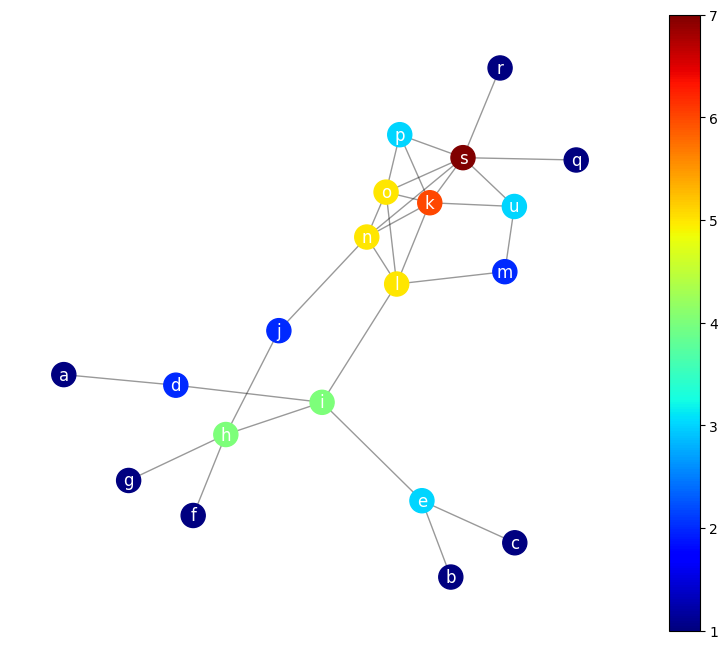

In [11]:
# the degree of network(g)
fig, ax = plt.subplots(1,1,figsize=(10,8))

# layout position
pos = nx.spring_layout(g,seed=123456789,k=0.3)
# color of nodes
color = list(dict(nx.degree(g)).values())

# draw edges
nx.draw_networkx_edges(g,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(g,
                 pos=pos,
                 node_color=color,
                 cmap=plt.cm.jet,ax=ax)

# draw labels
nx.draw_networkx_labels(g, pos=pos,
                        font_color='white', ax=ax)


plt.axis("off")
plt.colorbar(nodes)
plt.savefig('degree.png', transparent=True,dpi=300)
plt.show()

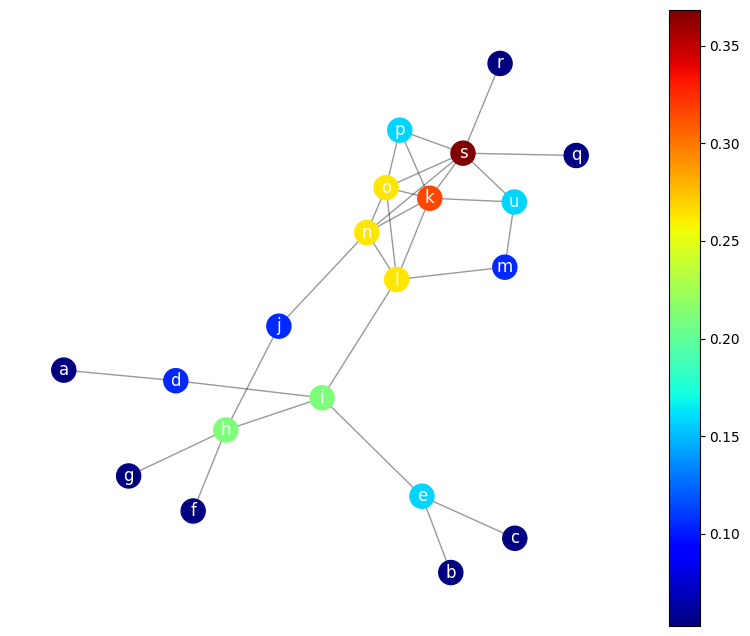

In [12]:
# the degree centrality of network(g)
fig, ax = plt.subplots(1,1,figsize=(10,8))

# layout position
pos = nx.spring_layout(g,seed=123456789,k=0.3)
# color of nodes
color = list(dict(nx.degree_centrality(g)).values())

# draw edges
nx.draw_networkx_edges(g,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(g,
                 pos=pos,
                 node_color=color,
                 cmap=plt.cm.jet,
                 ax=ax)

# draw labels
nx.draw_networkx_labels(g, pos=pos,
                        font_color='white', ax=ax)


plt.axis("off")
plt.colorbar(nodes)
plt.savefig('degree_centrality.png', transparent=True,dpi=300)
plt.show()

In [13]:
nx.degree_centrality(g)

{'a': 0.05263157894736842,
 'd': 0.10526315789473684,
 'b': 0.05263157894736842,
 'e': 0.15789473684210525,
 'c': 0.05263157894736842,
 'i': 0.21052631578947367,
 'f': 0.05263157894736842,
 'h': 0.21052631578947367,
 'g': 0.05263157894736842,
 'j': 0.10526315789473684,
 'l': 0.2631578947368421,
 'n': 0.2631578947368421,
 'm': 0.10526315789473684,
 'k': 0.3157894736842105,
 'o': 0.2631578947368421,
 'u': 0.15789473684210525,
 's': 0.3684210526315789,
 'p': 0.15789473684210525,
 'q': 0.05263157894736842,
 'r': 0.05263157894736842}

## 4.2 Closeness Centrality

In [14]:
nx.closeness_centrality(g)

{'a': 0.25333333333333335,
 'd': 0.3333333333333333,
 'b': 0.2602739726027397,
 'e': 0.34545454545454546,
 'c': 0.2602739726027397,
 'i': 0.4634146341463415,
 'f': 0.2835820895522388,
 'h': 0.3877551020408163,
 'g': 0.2835820895522388,
 'j': 0.3877551020408163,
 'l': 0.475,
 'n': 0.4418604651162791,
 'm': 0.3584905660377358,
 'k': 0.4222222222222222,
 'o': 0.41304347826086957,
 'u': 0.3275862068965517,
 's': 0.38,
 'p': 0.3220338983050847,
 'q': 0.27941176470588236,
 'r': 0.27941176470588236}

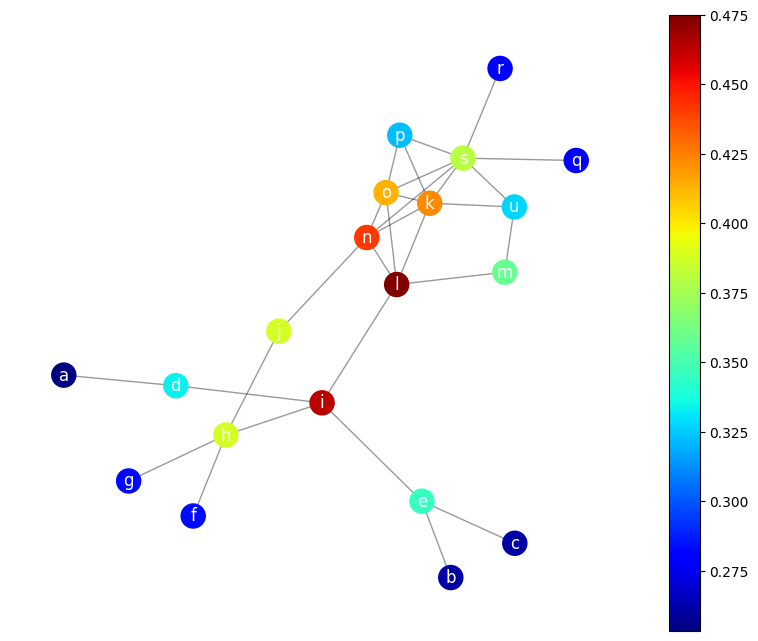

In [15]:
# the closeness centrality of network(g)
fig, ax = plt.subplots(1,1,figsize=(10,8))

# layout position
pos = nx.spring_layout(g,seed=123456789,k=0.3)
# color of nodes
color = list(dict(nx.closeness_centrality(g)).values())

# draw edges
nx.draw_networkx_edges(g,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(g,
                 pos=pos,
                 node_color=color,
                 cmap=plt.cm.jet,
                 ax=ax)

# draw labels
nx.draw_networkx_labels(g, pos=pos,
                        font_color='white', ax=ax)


plt.axis("off")
plt.colorbar(nodes)
plt.savefig('closeness_centrality.png', transparent=True,dpi=600)
plt.show()

## 4.3 Betweenness Centrality

In [16]:
nx.betweenness_centrality(g)

{'a': 0.0,
 'd': 0.10526315789473684,
 'b': 0.0,
 'e': 0.2046783625730994,
 'c': 0.0,
 'i': 0.5128654970760234,
 'f': 0.0,
 'h': 0.23976608187134502,
 'g': 0.0,
 'j': 0.10701754385964912,
 'l': 0.39005847953216366,
 'n': 0.18304093567251464,
 'm': 0.024853801169590642,
 'k': 0.11617933723196881,
 'o': 0.07378167641325536,
 'u': 0.023391812865497075,
 's': 0.2296296296296296,
 'p': 0.0,
 'q': 0.0,
 'r': 0.0}

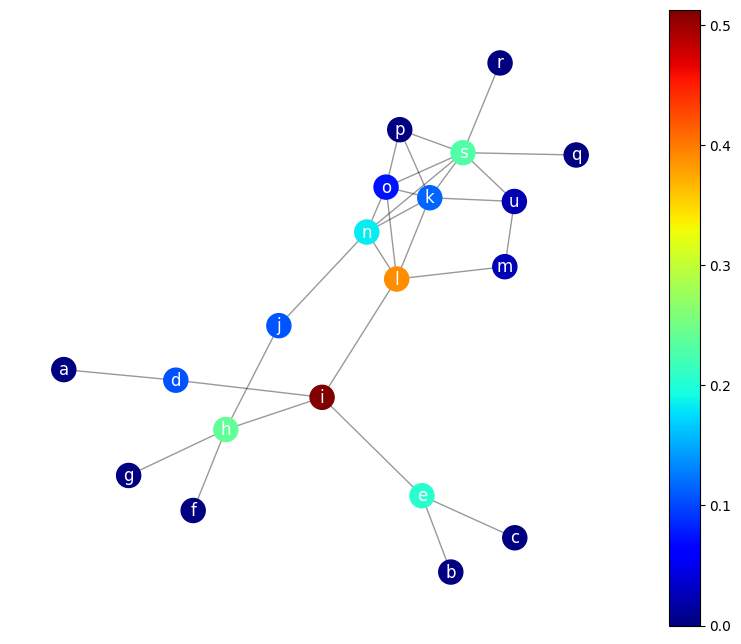

In [17]:
# the betwenness centrality of network(g)
fig, ax = plt.subplots(1,1,figsize=(10,8))

# layout position
pos = nx.spring_layout(g,seed=123456789,k=0.3)
# color of nodes
color = list(dict(nx.betweenness_centrality(g)).values())

# draw edges
nx.draw_networkx_edges(g,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(g,
                 pos=pos,
                 node_color=color,
                 cmap=plt.cm.jet,
                 ax=ax)

# draw labels
nx.draw_networkx_labels(g, pos=pos,
                        font_color='white', ax=ax)


plt.axis("off")
plt.colorbar(nodes)
plt.savefig('betweenness_centrality.png', transparent=True,dpi=600)
plt.show()

## 4.4 EigenVector Centrality

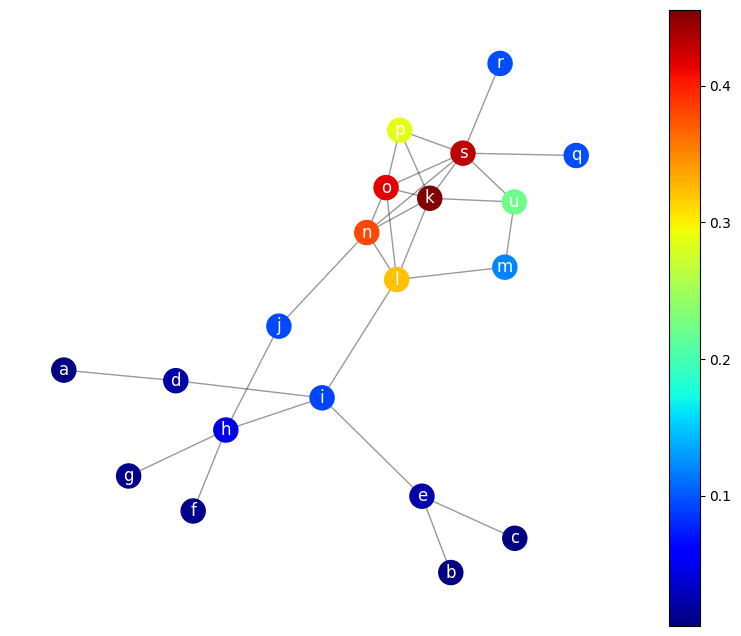

In [18]:
# the eigenvector centrality of network(g)
fig, ax = plt.subplots(1,1,figsize=(10,8))

# layout position
pos = nx.spring_layout(g,seed=123456789,k=0.3)
# color of nodes
color = list(dict(nx.eigenvector_centrality(g)).values())

# draw edges
nx.draw_networkx_edges(g,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(g,
                 pos=pos,
                 node_color=color,
                 cmap=plt.cm.jet,
                 ax=ax)

# draw labels
nx.draw_networkx_labels(g, pos=pos,
                        font_color='white', ax=ax)


plt.axis("off")
plt.colorbar(nodes)
plt.savefig('eigenvector_centrality.png', transparent=True,dpi=600)
plt.show()

## 4.5 All together

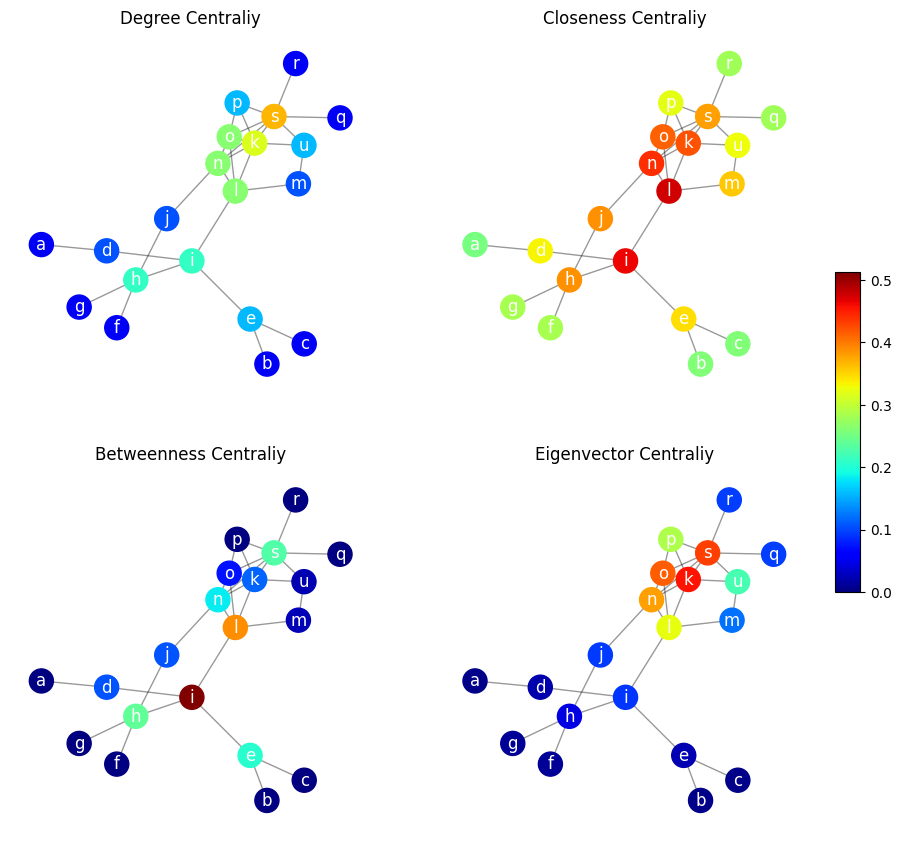

In [19]:
# the eigenvector centrality of network(g)
fig, ax = plt.subplots(2,2,figsize=(10,8))

# max value of metrics
max_centrality = max([max([v for k, v in nx.eigenvector_centrality(g).items()]),
                      max([v for k, v in nx.degree_centrality(g).items()]),
                      max([v for k, v in nx.closeness_centrality(g).items()]),
                      max([v for k, v in nx.betweenness_centrality(g).items()])])

# layout position
pos = nx.spring_layout(g,seed=123456789,k=0.3)

# color of nodes
color_degree = list(dict(nx.degree_centrality(g)).values())
color_closeness = list(dict(nx.closeness_centrality(g)).values())
color_betweenness = list(dict(nx.betweenness_centrality(g)).values())
color_eigenvector = list(dict(nx.eigenvector_centrality(g)).values())

#
# draw edges
#
# degree centrality
nx.draw_networkx_edges(g,
                       pos=pos,
                       alpha=0.4, ax=ax[0,0])

# closeness centrality
nx.draw_networkx_edges(g,
                       pos=pos,
                       alpha=0.4, ax=ax[0,1])

# betweenness centrality
nx.draw_networkx_edges(g,
                       pos=pos,
                       alpha=0.4, ax=ax[1,0])

# eigenvector centrality
nx.draw_networkx_edges(g,
                       pos=pos,
                       alpha=0.4, ax=ax[1,1])

# draw nodes
nodes = nx.draw_networkx_nodes(g,
                 pos=pos,
                 node_color=color_degree,
                 cmap=plt.cm.jet,vmin=0,vmax=max_centrality,
                 ax=ax[0,0])
nodes = nx.draw_networkx_nodes(g,
                 pos=pos,
                 node_color=color_closeness,
                 cmap=plt.cm.jet,vmin=0,vmax=max_centrality,
                 ax=ax[0,1])
nodes = nx.draw_networkx_nodes(g,
                 pos=pos,
                 node_color=color_betweenness,
                 cmap=plt.cm.jet,vmin=0,vmax=max_centrality,
                 ax=ax[1,0])
nodes = nx.draw_networkx_nodes(g,
                 pos=pos,
                 node_color=color_eigenvector,
                 cmap=plt.cm.jet,vmin=0,vmax=max_centrality,
                 ax=ax[1,1])

#
# draw labels
#
nx.draw_networkx_labels(g, pos=pos,
                        font_color='white', ax=ax[0,0])
nx.draw_networkx_labels(g, pos=pos,
                        font_color='white', ax=ax[0,1])
nx.draw_networkx_labels(g, pos=pos,
                        font_color='white', ax=ax[1,0])
nx.draw_networkx_labels(g, pos=pos,
                        font_color='white', ax=ax[1,1])

# eliminate axis
ax[0,0].axis("off")
ax[1,0].axis("off")
ax[0,1].axis("off")
ax[1,1].axis("off")

ax[0,0].set_title("Degree Centraliy")
ax[0,1].set_title("Closeness Centraliy")
ax[1,0].set_title("Betweenness Centraliy")
ax[1,1].set_title("Eigenvector Centraliy")


# Create an unique colorbar
# reference: https://stackoverflow.com/questions/60848582/unique-colorbar-at-the-right-of-multiple-subplots
plt.subplots_adjust(bottom=0., right=0.92, top=1.)
cax = plt.axes([0.95, 0.3, 0.025, 0.4])
sm = plt.cm.ScalarMappable(cmap=plt.cm.jet, norm=plt.Normalize(vmin=0, vmax=max_centrality))
cbar=plt.colorbar(sm,cax)

plt.savefig('alltogether.png', transparent=True,dpi=600,bbox_inches="tight")
plt.show()

# 5 Centrality Distribution

## 5.1 Histogram, PDF and CDF

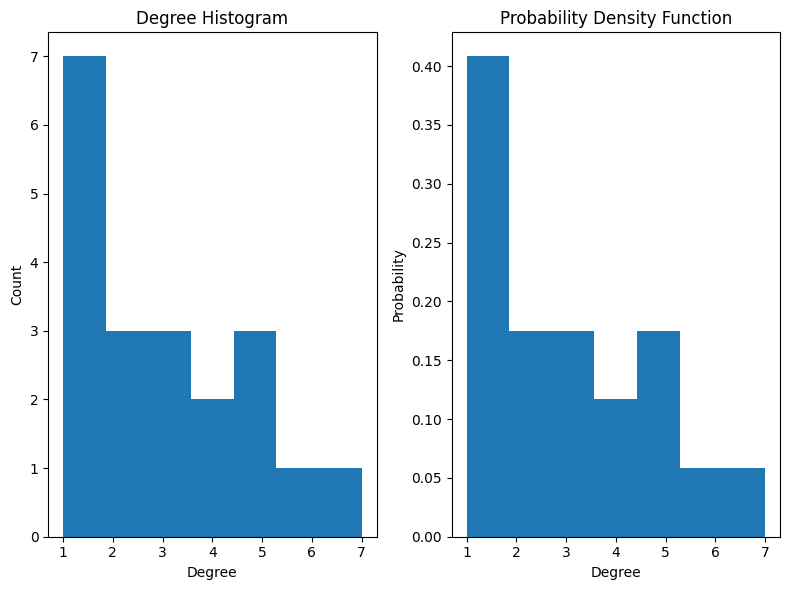

In [20]:
plt.style.use("default")
# degree sequence
degree_sequence = sorted([d for n, d in g.degree()], reverse=True)

fig, ax = plt.subplots(1,2,figsize=(8,6))

# all_data has information about degree_sequence and the width of each bin
all_data = ax[0].hist(degree_sequence,bins=7)
ax[1].hist(degree_sequence,bins=7,density=True)

ax[0].set_title("Degree Histogram")
ax[0].set_ylabel("Count")
ax[0].set_xlabel("Degree")

ax[1].set_title("Probability Density Function")
ax[1].set_ylabel("Probability")
ax[1].set_xlabel("Degree")

plt.tight_layout()
plt.show()

In [21]:
print(all_data)

(array([7., 3., 3., 2., 3., 1., 1.]), array([1.        , 1.85714286, 2.71428571, 3.57142857, 4.42857143,
       5.28571429, 6.14285714, 7.        ]), <BarContainer object of 7 artists>)


In [22]:
# print the width of each bin
print(all_data[1])

[1.         1.85714286 2.71428571 3.57142857 4.42857143 5.28571429
 6.14285714 7.        ]


In [23]:
# calc the width of each bin using numpy
# diff calc the difference between two positions in the array
bin_width = np.diff(all_data[1])
bin_width

array([0.85714286, 0.85714286, 0.85714286, 0.85714286, 0.85714286,
       0.85714286, 0.85714286])

In [24]:
# total number of elements in array
all_data[0].sum()

20.0

In [25]:
# probability density function for each bin
# please check the right figure above and compare the results
all_data[0]/(all_data[0].sum() * bin_width)

array([0.40833333, 0.175     , 0.175     , 0.11666667, 0.175     ,
       0.05833333, 0.05833333])

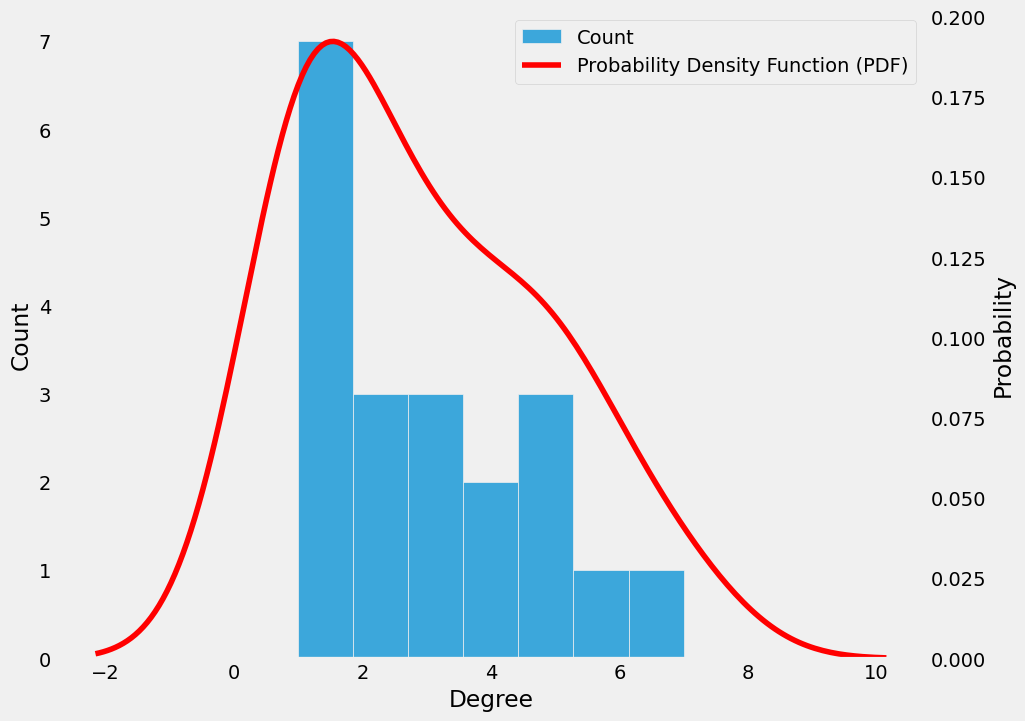

In [26]:
plt.style.use("fivethirtyeight")
#plt.style.use("default")

fig, ax = plt.subplots(1,1,figsize=(10,8))

sns.histplot(degree_sequence,bins=7,label="Count",ax=ax)
ax2 = ax.twinx()
sns.kdeplot(degree_sequence,color='r',label="Probability Density Function (PDF)",ax=ax2)

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.grid(False)
ax2.grid(False)
ax.set_xlabel("Degree")
ax2.set_ylabel("Probability")

plt.savefig('probability_density_function.png', transparent=True,dpi=600,bbox_inches="tight")
plt.show()

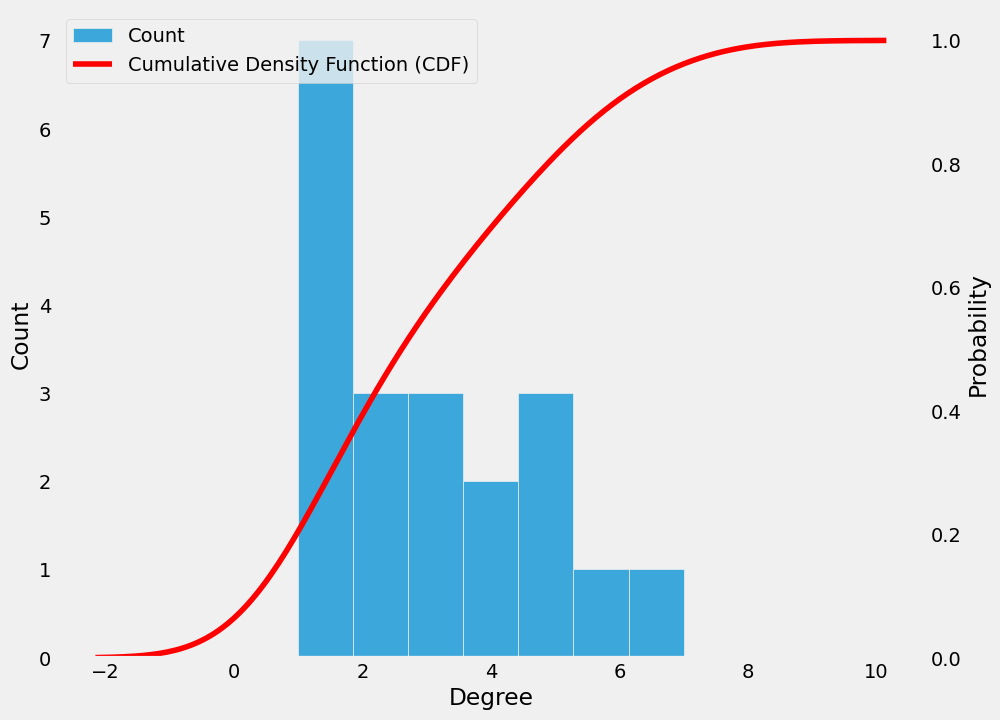

In [27]:
plt.style.use("fivethirtyeight")
#plt.style.use("default")

fig, ax = plt.subplots(1,1,figsize=(10,8))

sns.histplot(degree_sequence,bins=7,label="Count",ax=ax)
ax2 = ax.twinx()
sns.kdeplot(degree_sequence,color='r',label="Cumulative Density Function (CDF)",ax=ax2,cumulative=True)

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.grid(False)
ax2.grid(False)
ax.set_xlabel("Degree")
ax2.set_ylabel("Probability")

plt.savefig('cumulative_density_function.png', transparent=True,dpi=600,bbox_inches="tight")
plt.show()

In [28]:
plt.style.use("ggplot")

# Another way to visualize the cumulative distribution
def ecdf(data):
    return np.sort(data), np.arange(1, len(data) + 1) / len(data)

def ecdf_degree(G):
    """ECDF of degree."""
    num_neighbors = [len(list(G.neighbors(n))) for n in G.nodes()]
    x, y = ecdf(num_neighbors)
    plt.scatter(x, y)
    plt.xlabel("degree")
    plt.ylabel("cumulative fraction")

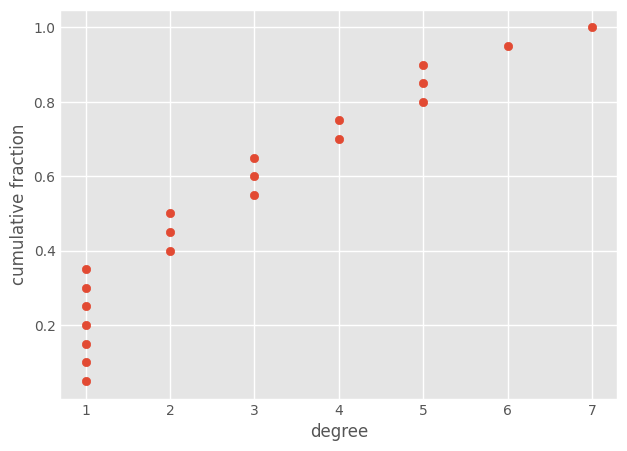

In [29]:
#
# insighs
# cdf(1) - almore 40% of vertices has degree 1
# cdf(2) P(degree <= 2) - 50% of vertices has at least degree 2 or less
# cdf(6) P(degree <= 6) - more than 95% of vertices has at least degree 6 or less
ecdf_degree(g)

## 5.2 Sociopatterns

At the time of writing (July 2021), finding important nodes in a graph has actually taken on a measure of importance that we might not have appreciated before. With the COVID-19 virus spreading, contact tracing has become quite important. In an infectious disease contact network, where individuals are nodes and contact between individuals of some kind are the edges, an "important" node in this contact network would be an individual who was infected who also was in contact with many people during the time that they were infected.

The dataset that we will use in this chapter is the ["sociopatterns network"](http://www.sociopatterns.org/datasets/infectious-sociopatterns-dynamic-contact-networks/) dataset. Incidentally, it's also about infectious diseases.

> This network describes the face-to-face behavior of people during the exhibition INFECTIOUS: STAY AWAY in 2009 at the Science Gallery in Dublin. Nodes represent exhibition visitors; edges represent face-to-face contacts that were active for at least 20 seconds. Multiple edges between two nodes are possible and denote multiple contacts. The network contains the data from the day with the most interactions

To simplify the network, we have represented only the last contact between individuals.



In [30]:
# download the dataset
!gdown https://drive.google.com/uc?id=1REW9CIhtNtdmoO5FrBPeCK5U39p5OMS5

Downloading...
From: https://drive.google.com/uc?id=1REW9CIhtNtdmoO5FrBPeCK5U39p5OMS5
To: /content/out.sociopatterns-infectious
100% 355k/355k [00:00<00:00, 96.0MB/s]


The meaning of the columns in out.sociopatterns-infectious are:

- First column: ID of from node
- Second column: ID of to node
- Third column: edge weight
- Fourth column: timestamp of the edge

In [31]:
# Read the edge list
df = pd.read_csv("out.sociopatterns-infectious",sep=" ",skiprows=2,header=None)
df.head()

,0,1,2,3
0,100,101,1,1247658439
1,100,101,1,1247660019
2,100,102,1,1247658579
3,100,103,1,1247658159
4,100,103,1,1247658179


In [32]:
# lets use only the first three columns
df = df[[0, 1, 2]]
df.columns = ["person1", "person2", "weight"]
df.head()

,person1,person2,weight
0,100,101,1
1,100,101,1
2,100,102,1
3,100,103,1
4,100,103,1


In [33]:
g2 = nx.Graph()

for row in df.iterrows():
  p1 = row[1]["person1"]
  p2 = row[1]["person2"]
  if g2.has_edge(p1, p2):
    g2.edges[p1, p2]["weight"] += 1
  else:
    g2.add_edge(p1, p2, weight=1)

for n in sorted(g2.nodes()):
  g2.nodes[n]["order"] = float(n)

In [34]:
# As usual, before proceeding with any analysis, we should know basic graph statistics.
len(g2.nodes),len(g2.edges())

(410, 2765)

In [35]:
# small network
len(g.nodes),len(g.edges())

(20, 29)

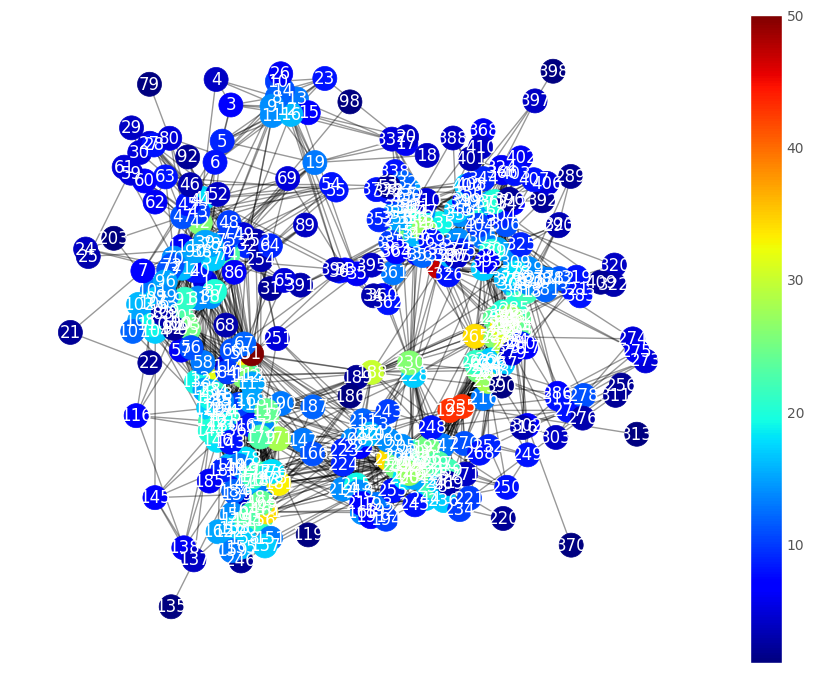

In [36]:
# the degree of network(g2)
fig, ax = plt.subplots(1,1,figsize=(10,8))

# layout position
pos = nx.spring_layout(g2,seed=123456789,k=0.3)
# color of nodes
color = list(dict(nx.degree(g2)).values())

# draw edges
nx.draw_networkx_edges(g2,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(g2,
                 pos=pos,
                 node_color=color,
                 cmap=plt.cm.jet,ax=ax)

# draw labels
nx.draw_networkx_labels(g2, pos=pos,
                        font_color='white', ax=ax)


plt.axis("off")
plt.colorbar(nodes)
plt.savefig('degree_sociopatterns.png', transparent=True,dpi=600)
plt.show()

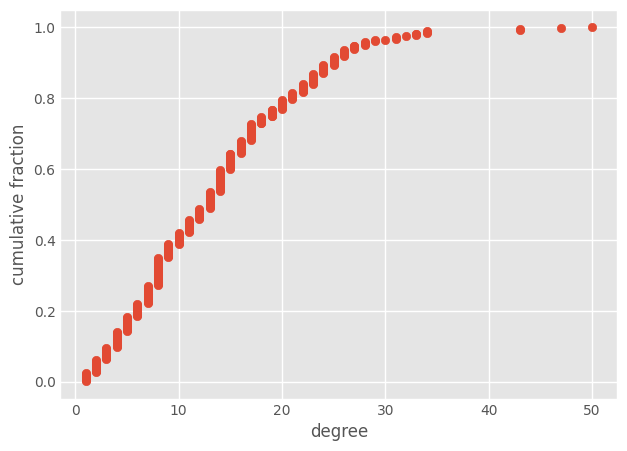

In [37]:
ecdf_degree(g2)

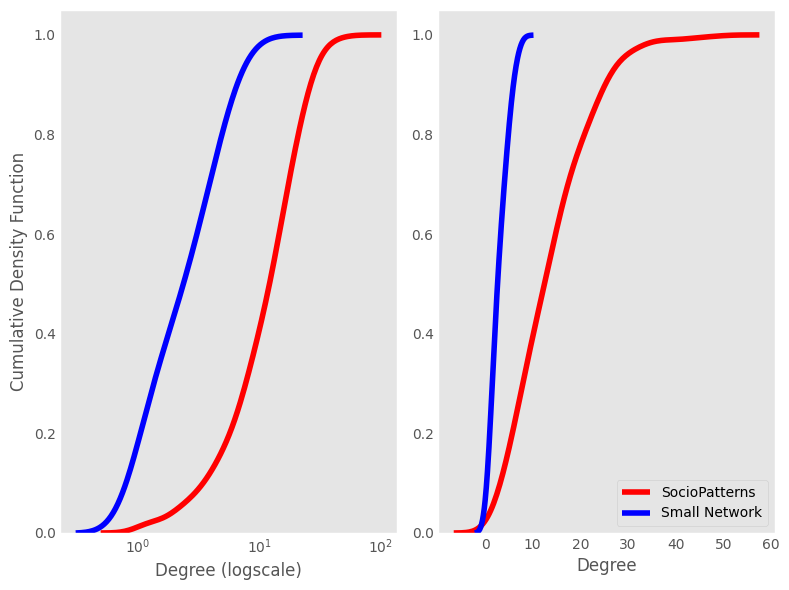

In [38]:
plt.style.use("ggplot")
#plt.style.use("default")

fig, ax = plt.subplots(1,2,figsize=(8,6))

# degree sequence
degree_sequence2 = sorted([d for n, d in g2.degree()], reverse=True)

sns.kdeplot(degree_sequence2,color='r',label="SocioPatterns",ax=ax[0],cumulative=True,log_scale=True)
sns.kdeplot(degree_sequence,color='b',label="Small Network",ax=ax[0],cumulative=True,log_scale=True)

ax[0].grid(False)
ax[0].set_xlabel("Degree (logscale)")
ax[0].set_ylabel("Cumulative Density Function")
#ax[0].legend(loc="lower right")

sns.kdeplot(degree_sequence2,color='r',label="SocioPatterns",ax=ax[1],cumulative=True,log_scale=False)
sns.kdeplot(degree_sequence,color='b',label="Small Network",ax=ax[1],cumulative=True,log_scale=False)

ax[1].grid(False)
ax[1].set_xlabel("Degree")
ax[1].set_ylabel("")
ax[1].legend(loc="lower right")

plt.tight_layout()
plt.savefig('comparative_cumulative_density_function.png', transparent=True,dpi=600,bbox_inches="tight")
plt.show()

## 5.3 Comparizon between centrality measurements

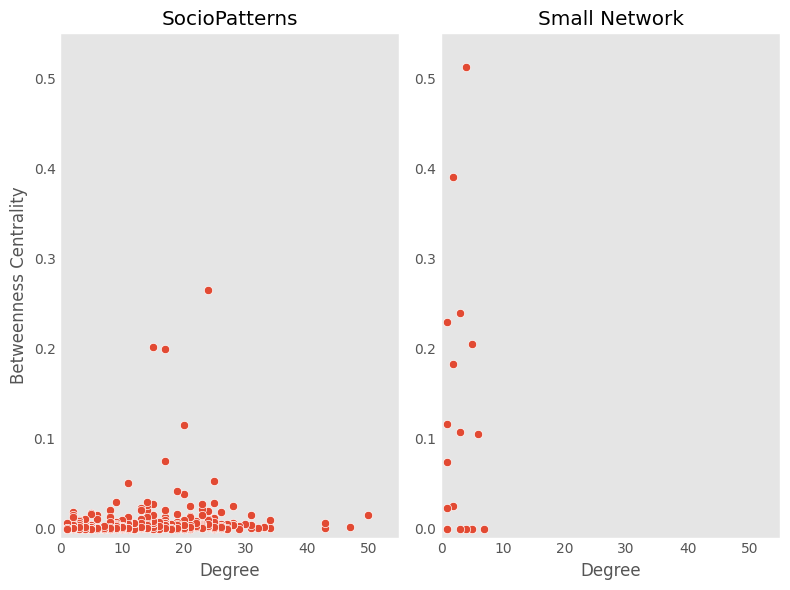

In [39]:
plt.style.use("ggplot")
#plt.style.use("default")

fig, ax = plt.subplots(1,2,figsize=(8,6))

# degree sequence
degree_sequence2 = sorted([d for n, d in g2.degree()], reverse=True)

sns.scatterplot(x=degree_sequence2,y=[v for k,v in nx.betweenness_centrality(g2).items()],ax=ax[0])
ax[0].set_xlabel("Degree")
ax[0].set_ylabel("Betweenness Centrality")
ax[0].set_title("SocioPatterns")
ax[0].set_xlim(0,55)
ax[0].set_ylim(-0.01,0.55)
ax[0].grid(False)

sns.scatterplot(x=degree_sequence,y=[v for k,v in nx.betweenness_centrality(g).items()],ax=ax[1])
ax[1].set_xlabel("Degree")
ax[1].set_title("Small Network")
ax[1].set_xlim(0,55)
ax[1].set_ylim(-0.01,0.55)
ax[1].grid(False)

plt.tight_layout()
plt.savefig('degree_vs_betweenness.png', transparent=True,dpi=600,bbox_inches="tight")
plt.show()

In [40]:
bc = pd.Series(nx.betweenness_centrality(g2))
dc = pd.Series(nx.degree_centrality(g2))
ec = pd.Series(nx.eigenvector_centrality(g2))
cc = pd.Series(nx.closeness_centrality(g2))

df = pd.DataFrame.from_dict({"Betweenness": bc,
                            "Degree": dc,
                            "EigenVector": ec,
                            "Closeness": cc})
df.reset_index(inplace=True,drop=True)
df.head()

,Betweenness,Degree,EigenVector,Closeness
0,0.014809,0.070905,0.003435,0.315830
1,0.001398,0.031785,0.001452,0.283831
2,0.000748,0.039120,0.001433,0.269256
3,0.006735,0.063570,0.002439,0.294033
4,0.001198,0.041565,0.001513,0.268197


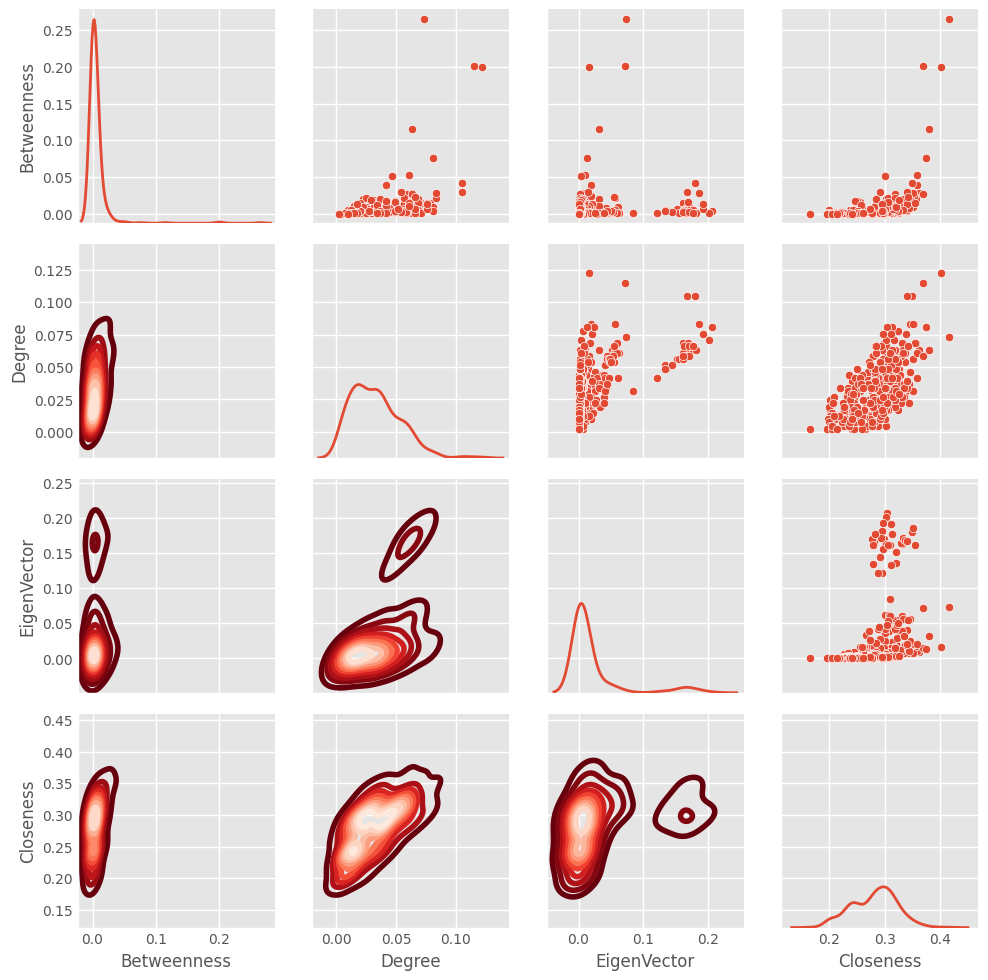

In [41]:
fig = sns.PairGrid(df)
fig.map_upper(sns.scatterplot)
fig.map_lower(sns.kdeplot, cmap="Reds_r")
fig.map_diag(sns.kdeplot, lw=2, legend=False)

plt.savefig('all.png', transparent=True,dpi=800,bbox_inches="tight")
plt.show()

# 6 Core Decomposition

In [42]:
# k-core of the network
# 1-core
# 2-core
# 3-core
set([v for k,v in nx.core_number(g).items()])

{1, 2, 3}

In [43]:
#
# Change the variable core to visualize the nodes in k-core
# Note that 0-core is the all network
core = 3
for i in nx.k_core(g,core):
  print(i)

k
n
l
p
s
o


In [44]:
#
# Change the variable shell to visualize the nodes in k-shell
# Note that vertices in k-shell are member of k-core, however they are not member of (k+1)-core
shell = 3
for i in nx.k_shell(g,shell):
  print(i)

k
n
l
p
s
o


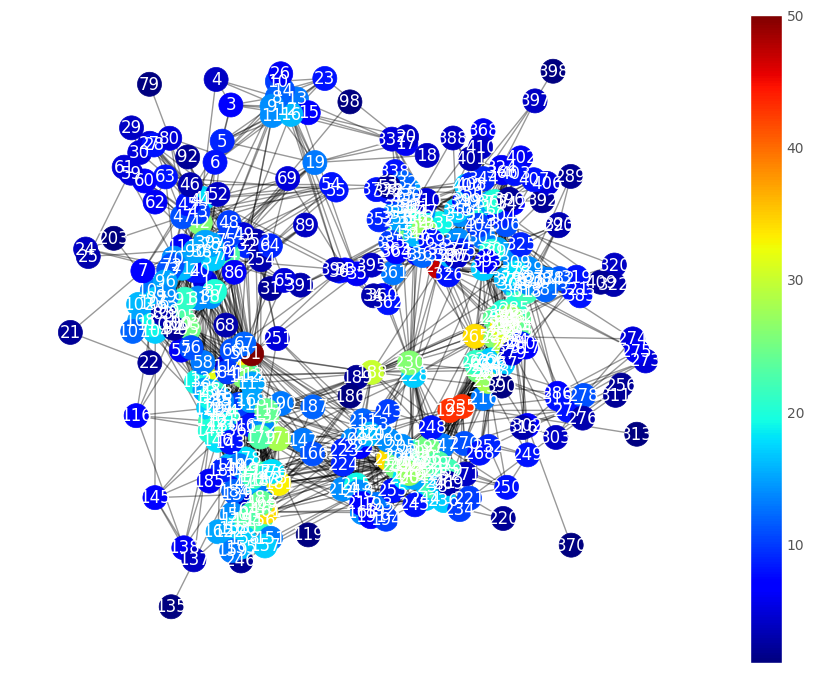

In [45]:
# the degree of network(g2)
fig, ax = plt.subplots(1,1,figsize=(10,8))

# layout position
pos = nx.spring_layout(g2,seed=123456789,k=0.3)
# color of nodes
color = list(dict(nx.degree(g2)).values())

# draw edges
nx.draw_networkx_edges(g2,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(g2,
                 pos=pos,
                 node_color=color,
                 cmap=plt.cm.jet,ax=ax)

# draw labels
nx.draw_networkx_labels(g2, pos=pos,
                        font_color='white', ax=ax)


plt.axis("off")
plt.colorbar(nodes)
plt.savefig('sociopatterns.png', transparent=True,dpi=600)
plt.show()

In [46]:
# How many k-cores does this network have?
set([v for k,v in nx.core_number(g2).items()])

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 17}

In [47]:
# 1-core is composed for all vertices in the network because this network is connected
len([g2.degree(node) for node in list(nx.k_core(g2,1))])

410

In [48]:
# how to calculate shell by hands
a = [node for node in list(nx.k_core(g2,1))]
b = [node for node in list(nx.k_core(g2,2))]
np.setxor1d(a,b)

array([ 79,  98, 119, 135, 186, 203, 313, 370, 390, 398])

In [49]:
# who are in the innermost core
print(list(nx.k_shell(g2,17)))

[257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 281, 282, 283, 284, 285, 287, 288, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 314, 195, 235]


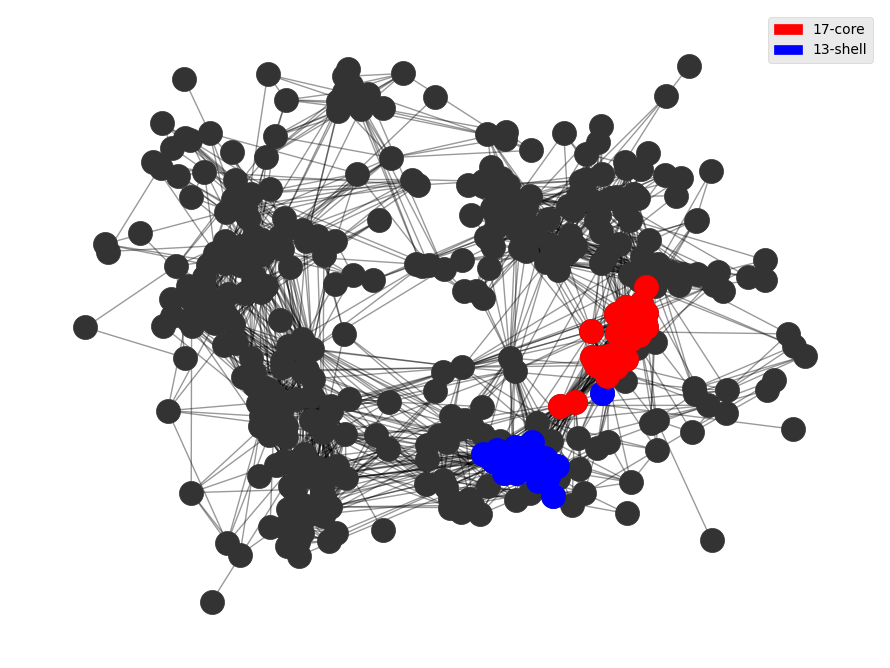

In [50]:
# the degree of network(g2)
fig, ax = plt.subplots(1,1,figsize=(10,8))

# Find k-cores
g2_core_13 = nx.k_shell(g2, 13)
g2_core_17 = nx.k_core(g2, 17)

# layout position
pos = nx.spring_layout(g2,seed=123456789,k=0.3)

# draw edges
nx.draw_networkx_edges(g2,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(g2,
                 pos=pos,
                 node_color="#333333")

# draw nodes
nodes = nx.draw_networkx_nodes(g2_core_13,
                 pos=pos,
                 node_color="blue")

nodes = nx.draw_networkx_nodes(g2_core_17,
                 pos=pos,
                 node_color="red")

# static legend
red_patch = mpatches.Patch(color='red', label='17-core')
blue_patch = mpatches.Patch(color='blue', label='13-shell')
plt.legend(handles=[red_patch,blue_patch])

plt.axis("off")
plt.savefig('k-core_sociopatterns.png', transparent=True,dpi=600)
plt.show()